# Simple Linear Regression

**In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.**

First we start by importing important libraries to work with.

In [1]:
import pandas as pd # to manipulate data using dataframes
import numpy as np # to perform mathematical operations on arrays
from sklearn.linear_model import LinearRegression # to perform linear regression
from sklearn.model_selection import train_test_split # to divide the data into train and test set
from sklearn.metrics import mean_absolute_error # to calculate mean absolute error

# to visualise the results
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# loading the data into a pandas dataframe
Data = "http://bit.ly/w-data"
raw_data = pd.read_csv(Data)

raw_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


**We can see above that our data has been loaded into a pandas dataframe. There are two columns: Hours and Scores.
"Hours" represents the no. of hour for which the students have studied and "Scores" represent the marks scored by the student corresponding to the no. of hours they have studied.**

**We will now visualise this data byt plotting it on a graph.
The x axis will correspond to the Hours and y axis will correspond to the Scores.**

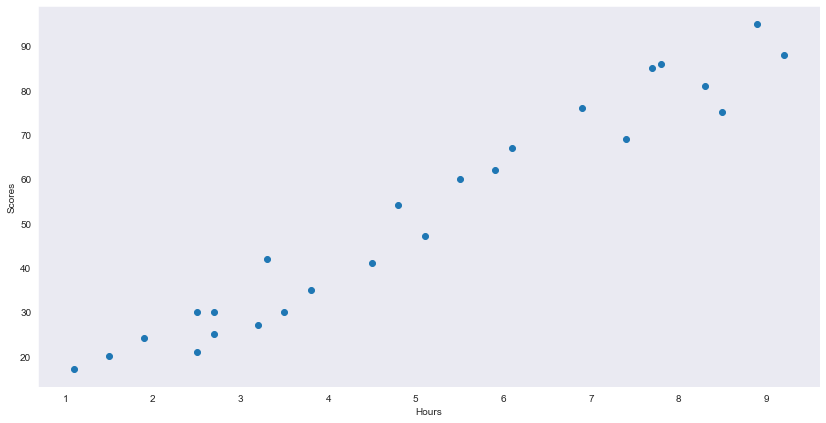

In [3]:
# plotting the datapoints on a graph two visualise the relationship between the two features Hours and Scores.
sns.set_style("dark")
plt.figure(figsize=(14,7)) # setting the size of the figure
plt.scatter(raw_data['Hours'],raw_data['Scores'])     # plotting data points
plt.xlabel("Hours")  # naming x-axis
plt.ylabel("Scores") # naming y-axis
plt.show() # displaying the figure

**The above graph shows a clear correlation between Hours and Scores and their relationship is linear. Thus data is relevant and we can move ahead with our task of simple linear regression.**

**We will now create two variables with x and y corresponding to Hours and Scores column respectively and they will have the values of the columns Hours and Scores in the form of an array.**

In [4]:
# converting the dataframe columns into numpy arrays

# x variable corresponds to the Hours
x=np.array(raw_data["Hours"]).reshape((-1,1)) # reshaping the data to make it suitable for fitting the regression line
# y variable corresponds to the Score
y=np.array(raw_data["Scores"])

In [5]:
# displaying the size of the arrays
print(x.shape)
print(y.shape)

(25, 1)
(25,)


**We will now split this data into train and test set in the ratio 80:20.
The train set is used for training the model and the test set is used for measuring the peroformance of the model as this is set is not preknown to the model.**

In [6]:
# splitting the data into train and test set
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [7]:
# displaying the size of the arrays after splitting
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(18, 1)
(18,)
(7, 1)
(7,)


**We are now ready to perform the regression. We will fit the model using Train set and then we will test the model by using the Test set.**

In [8]:
# define the model by creating an object of LinearRegression class.
model=LinearRegression()
# fit the model on trainig data
model.fit(x_train,y_train)

LinearRegression()

Text(0.5, 1.0, 'Regression Line')

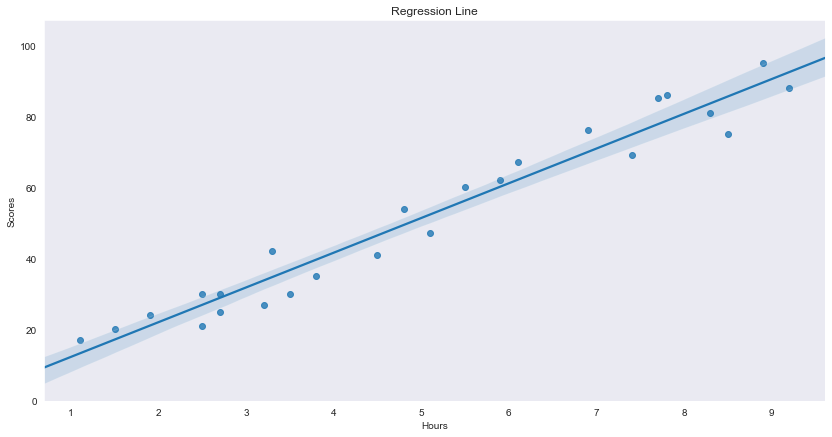

In [9]:
# plotting the regression line along with the data
plt.figure(figsize=((14,7)))
sns.regplot(x, y)
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Regression Line")

In [10]:
# predict the model on test data i.e. predict the corresponding values of scores for each value of x_test using the model
# trained on x_train and y _train
y_pred=model.predict(x_test)
y_pred

array([16.84472176, 33.74557494, 75.50062397, 26.7864001 , 60.58810646,
       39.71058194, 20.8213931 ])

**What needs to be understood is that when we train the model using the train set , the model learns the relationship between x_train and y train and while making predictions the model maps the same relationship between x_test and y_pred.**

**Since in this case we already know the true values of scores corresponding to the x_test (i.e. y_test), therefore we can measure the performance of the model by calculating the mean absolute error (one of many metrics that can be used for this purpose).**

In [11]:
#calculate the error between the predicted outcome and y_test 
#This is our measure of model quality, we should try to minimize it for better predictions.
MAE=mean_absolute_error(y_test,y_pred)
MAE

4.130879918502486

**MAKING PREDICTIONS**

**We will now predict the score of a student who studied for 9.25 hours based on our model.**

In [12]:
x_new=np.array([9.25]).reshape((-1,1)) # setting the value of x as 9.25
y_new=model.predict(x_new) # predicting the score

In [13]:
print (" For {} Hours, the predicted Score is: {}".format(x_new[0][0],y_new[0]))

 For 9.25 Hours, the predicted Score is: 93.89272889341655
